In [1]:
import torch
import numpy as np
from torch.distributions.normal import Normal
from sklearn.isotonic import IsotonicRegression
import matplotlib.pyplot as plt

In [2]:
result_dir = '../output/esol/DNN-rdkit/none/seed-0/preds/0.pt'

In [3]:
results = torch.load(result_dir)
lbs = results['lbs']
preds = results['preds']['preds']
var = results['preds']['vars']
stds = np.sqrt(var)
masks = results['masks']

In [4]:
m = Normal(torch.from_numpy(preds).squeeze(), torch.from_numpy(stds).squeeze())
cdf = m.cdf(torch.from_numpy(lbs).squeeze()).numpy()


In [6]:
empirical_cdf = np.zeros(len(cdf))
for i, p in enumerate(cdf):
    empirical_cdf[i] = np.sum(cdf <= p)/len(cdf)

In [7]:
empirical_cdf

array([0.60176991, 0.07964602, 0.51327434, 0.76106195, 0.30088496,
       0.3539823 , 0.46017699, 0.08849558, 0.14159292, 0.98230088,
       0.69026549, 0.48672566, 0.43362832, 0.10619469, 0.31858407,
       0.42477876, 1.        , 0.53982301, 0.24778761, 0.62831858,
       0.7699115 , 0.23893805, 0.21238938, 0.54867257, 0.73451327,
       0.92920354, 0.53097345, 0.20353982, 0.15044248, 0.36283186,
       0.77876106, 0.79646018, 0.87610619, 0.50442478, 0.13274336,
       0.90265487, 0.11504425, 0.99115044, 0.37168142, 0.0619469 ,
       0.82300885, 0.40707965, 0.00884956, 0.15929204, 0.67256637,
       0.5840708 , 0.02654867, 0.88495575, 0.56637168, 0.69911504,
       0.27433628, 0.18584071, 0.30973451, 0.46902655, 0.22123894,
       0.32743363, 0.26548673, 0.63716814, 0.28318584, 0.65486726,
       0.6460177 , 0.12389381, 0.97345133, 0.81415929, 0.4159292 ,
       0.84955752, 0.01769912, 0.78761062, 0.61946903, 0.2920354 ,
       0.61061947, 0.16814159, 0.89380531, 0.75221239, 0.95575

In [8]:
def plot_calibration_curve(pcdf, ecdf):
    '''Plot calibration curve as described in paper (figure 3b).

    Parameters
    ----------
    ax : matplotlib axis object
        Axis to plot on

    Returns
    -------
    ax : matplotlib axis object
        Axis after it has been plotted on

    '''
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    ax.scatter(pcdf, ecdf, alpha=0.7)
    ax.plot([0,1],[0,1],'--', color='grey', label='Perfect calibration')
    ax.set_xlabel('Predicted', fontsize=17)
    ax.set_ylabel('Empirical', fontsize=17)
    ax.set_title('Empirical against Predicted CDF', fontsize=17)
    ax.legend(fontsize=17)

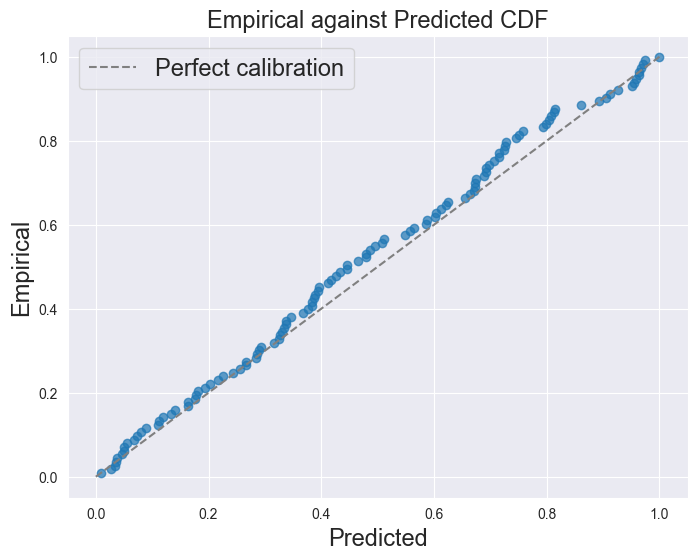

In [9]:
plot_calibration_curve(cdf, empirical_cdf)

In [10]:
isotonic_regression = IsotonicRegression()
isotonic_regression.fit(torch.from_numpy(empirical_cdf), torch.from_numpy(cdf))
None


In [51]:
original_t = torch.tensor([0.02275, 0.1586553, 0.5, 0.841347, 0.97725])

In [52]:
calibrated = isotonic_regression.transform(original_t)

In [53]:
sg = Normal(0, 1)

In [54]:
1 - sg.cdf(torch.tensor(1)).item()

0.1586552858352661

In [55]:
calibrated

array([0.03088841, 0.14076471, 0.44616427, 0.79899992, 0.96887603])

In [57]:
div = torch.abs(torch.from_numpy(calibrated)-0.446164) / torch.abs(original_t-0.5)
div

tensor([0.8701, 0.8947,    inf, 1.0337, 1.0953], dtype=torch.float64)

In [39]:
m = Normal(torch.from_numpy(preds).squeeze(), torch.from_numpy(stds).squeeze() * std_scale)
cdf = m.cdf(torch.from_numpy(lbs).squeeze()).numpy()

empirical_cdf = np.zeros(len(cdf))
for i, p in enumerate(cdf):
    empirical_cdf[i] = np.sum(cdf <= p) / len(cdf)

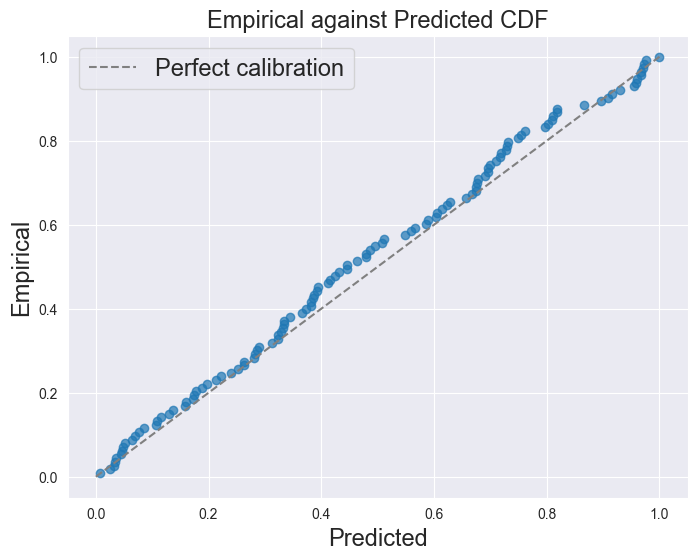

In [36]:
plot_calibration_curve(cdf, empirical_cdf)